Норма исходного сигнала: 0.16
Энергия исходного сигнала: 2.62e-02 Дж


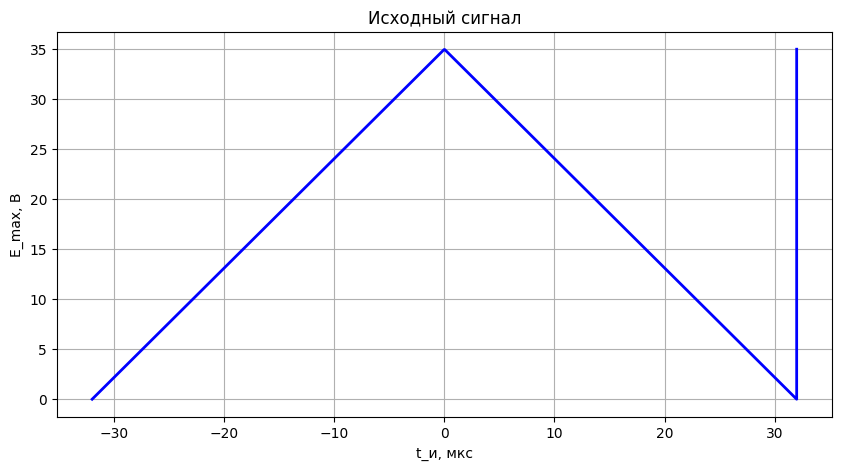

Для k=2 коэффициентов: фактические потери 25.07%


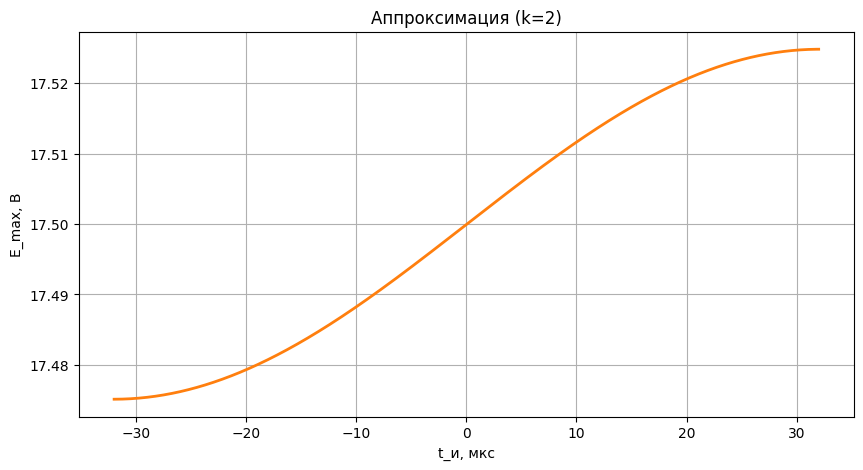

Для k=4 коэффициентов: фактические потери 0.60%


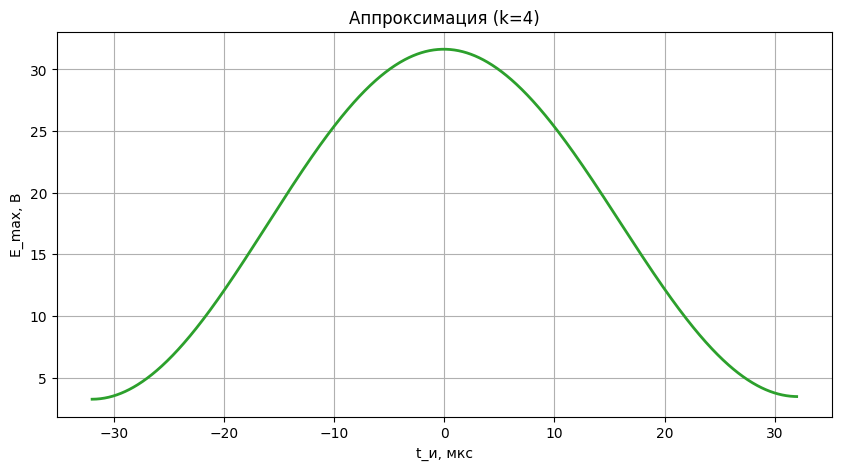

Для k=25 коэффициентов: фактические потери 0.27%


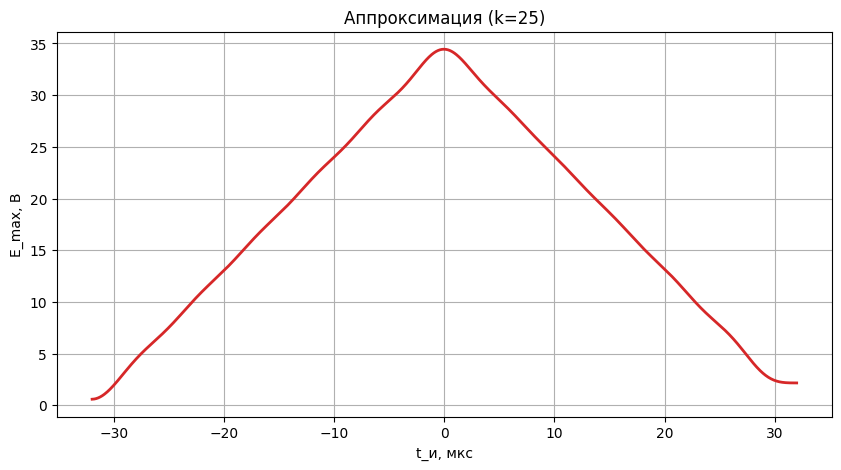

Для k=62 коэффициентов: фактические потери 0.26%


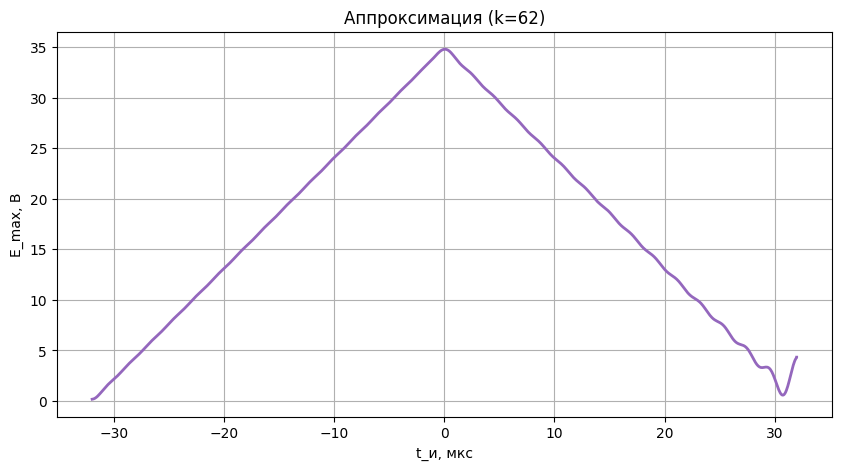

Для k=180 коэффициентов: фактические потери 0.19%


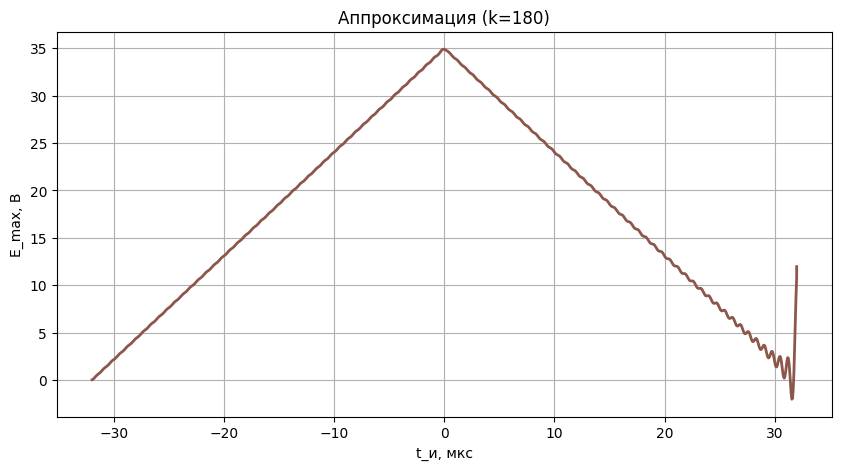

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

E_max = 35
t_i = 64e-6

count_cs = [2, 4, 25, 62, 180]
n = 1024
t_vals = np.linspace(-t_i / 2, t_i / 2, n)
signal_vals = np.where(t_vals < 0, E_max * (1 + 2 * t_vals / t_i), E_max * (1 - 2 * t_vals / t_i))

t_vals = np.append(t_vals, t_vals[-1])
signal_vals = np.append(signal_vals, E_max)

def calculate_signal_energy(signal, t):
    dt = t[1] - t[0]
    return np.sum(signal**2) * dt

def approximate_signal_dct(signal, k_max):
    signal = np.array(signal, dtype=np.float64)
    dct_coeffs = tf.signal.dct(tf.convert_to_tensor(signal, dtype=tf.float64), type=2, norm="ortho")
    dct_coeffs_zeroed = tf.concat([dct_coeffs[:k_max], tf.zeros_like(dct_coeffs[k_max:])], axis=0)
    return tf.signal.idct(dct_coeffs_zeroed, type=2, norm="ortho").numpy()

def plot_signal(t, signal, title, color):
    plt.figure(figsize=(10, 5))
    plt.plot(t * 1e6, signal, color=color, linewidth=2)
    plt.xlabel("t_и, мкс")
    plt.ylabel("Е_max, В")
    plt.title(title)
    plt.grid(True)
    plt.show()

E_s = calculate_signal_energy(signal_vals, t_vals)
norma = np.sqrt(E_s)
print(f"Норма исходного сигнала: {norma:.2f}")
print(f"Энергия исходного сигнала: {E_s:.2e} Дж")

plot_signal(t_vals, signal_vals, "Исходный сигнал", "blue")

for i, k in enumerate(count_cs):
    approx = approximate_signal_dct(signal_vals, k)
    E_w = calculate_signal_energy(approx, t_vals)
    loss = abs(E_s - E_w) / E_s * 100
    print(f"Для k={k} коэффициентов: фактические потери {loss:.2f}%")
    plot_signal(t_vals, approx, f"Аппроксимация (k={k})", f"C{i+1}")